<a href="https://colab.research.google.com/github/RaphaelAsogwa/Efficient-Real-time-Traffic-anomaly-Detection-In-Cybersecurity/blob/main/network_traffic_anomaly_detection_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
cicd_data = pd.read_csv('/content/drive/MyDrive/cicddos2019_dataset.csv')
cicd_data.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [6]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Label' is the column you want to encode in cicd_data
label_encoder = LabelEncoder()
#X_cicd['Label'] = label_encoder.fit_transform(X_cicd['Label'])
cicd_data['Label'] = label_encoder.fit_transform(cicd_data['Label'])
cicd_data['Class'] = label_encoder.fit_transform(cicd_data['Class'])
cicd_data.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0


In [7]:
syn_data = pd.read_csv('/content/drive/MyDrive/synthetic_network_traffic.csv')
syn_data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,IsAnomaly
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0


In [10]:
syn_data.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Protocol', 'BytesSent', 'BytesReceived', 'PacketsSent',
       'PacketsReceived', 'Duration', 'IsAnomaly'],
      dtype='object')

In [9]:
cicd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [8]:
syn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SourceIP         1000000 non-null  float64
 1   DestinationIP    1000000 non-null  float64
 2   SourcePort       1000000 non-null  float64
 3   DestinationPort  1000000 non-null  float64
 4   Protocol         1000000 non-null  float64
 5   BytesSent        1000000 non-null  float64
 6   BytesReceived    1000000 non-null  float64
 7   PacketsSent      1000000 non-null  float64
 8   PacketsReceived  1000000 non-null  float64
 9   Duration         1000000 non-null  float64
 10  IsAnomaly        1000000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 83.9 MB


In [11]:
syn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SourceIP,1000000.0,-0.000645,1.000721,-4.980146,-0.675493,-0.000708,0.672675,5.032374
DestinationIP,1000000.0,0.000899,0.999597,-4.841791,-0.672789,-0.000433,0.676014,4.984215
SourcePort,1000000.0,-0.002857,1.000583,-4.829436,-0.679471,-0.003061,0.670509,4.565550
DestinationPort,1000000.0,0.001966,1.000004,-4.644419,-0.672742,0.001888,0.676370,4.748345
Protocol,1000000.0,-0.000958,0.999299,-4.950266,-0.675323,-0.000974,0.671899,4.920315
BytesSent,1000000.0,-0.001099,1.000560,-4.630858,-0.676730,-0.001224,0.674718,5.220045
BytesReceived,1000000.0,0.001715,1.000138,-4.462969,-0.671568,0.002324,0.677180,5.033805
PacketsSent,1000000.0,0.000153,0.999976,-4.564944,-0.674591,0.000994,0.675133,4.827623
PacketsReceived,1000000.0,0.001019,0.999260,-5.195261,-0.673667,0.001513,0.675576,4.795172
Duration,1000000.0,-0.000832,0.999992,-4.625258,-0.676727,-0.000485,0.673657,4.913122


In [12]:
cicd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,431371.0,1.268353e+05,8.724962e+04,0.0,53921.0,107842.0,198357.5,306200.0
Protocol,431371.0,1.394869e+01,4.966712e+00,0.0,6.0,17.0,17.0,17.0
Flow Duration,431371.0,8.404856e+06,2.126596e+07,1.0,787.0,44804.0,3002507.5,119998742.0
Total Fwd Packets,431371.0,2.413912e+01,1.958889e+02,1.0,4.0,4.0,16.0,86666.0
Total Backward Packets,431371.0,2.472021e+00,5.637021e+01,0.0,0.0,0.0,2.0,31700.0
...,...,...,...,...,...,...,...,...
Idle Std,431371.0,4.983262e+05,2.005164e+06,0.0,0.0,0.0,0.0,69614024.0
Idle Max,431371.0,2.971142e+06,9.045327e+06,0.0,0.0,0.0,0.0,119219450.0
Idle Min,431371.0,1.993859e+06,7.245561e+06,0.0,0.0,0.0,0.0,119219450.0
Label,431371.0,6.897318e+00,5.375729e+00,0.0,3.0,4.0,13.0,17.0


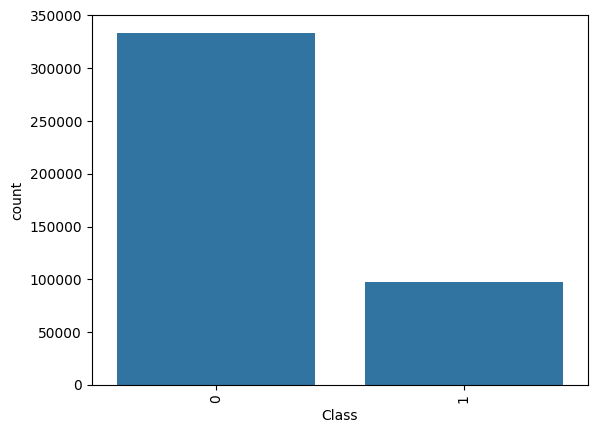

In [13]:
sns.countplot(x='Class', data=cicd_data)
plt.xticks(rotation=90)
plt.show()

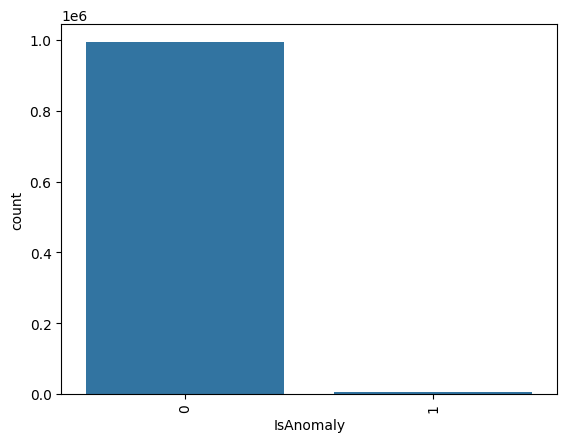

In [ ]:
sns.countplot(x='IsAnomaly', data=syn_data)
plt.xticks(rotation=90)
plt.show()

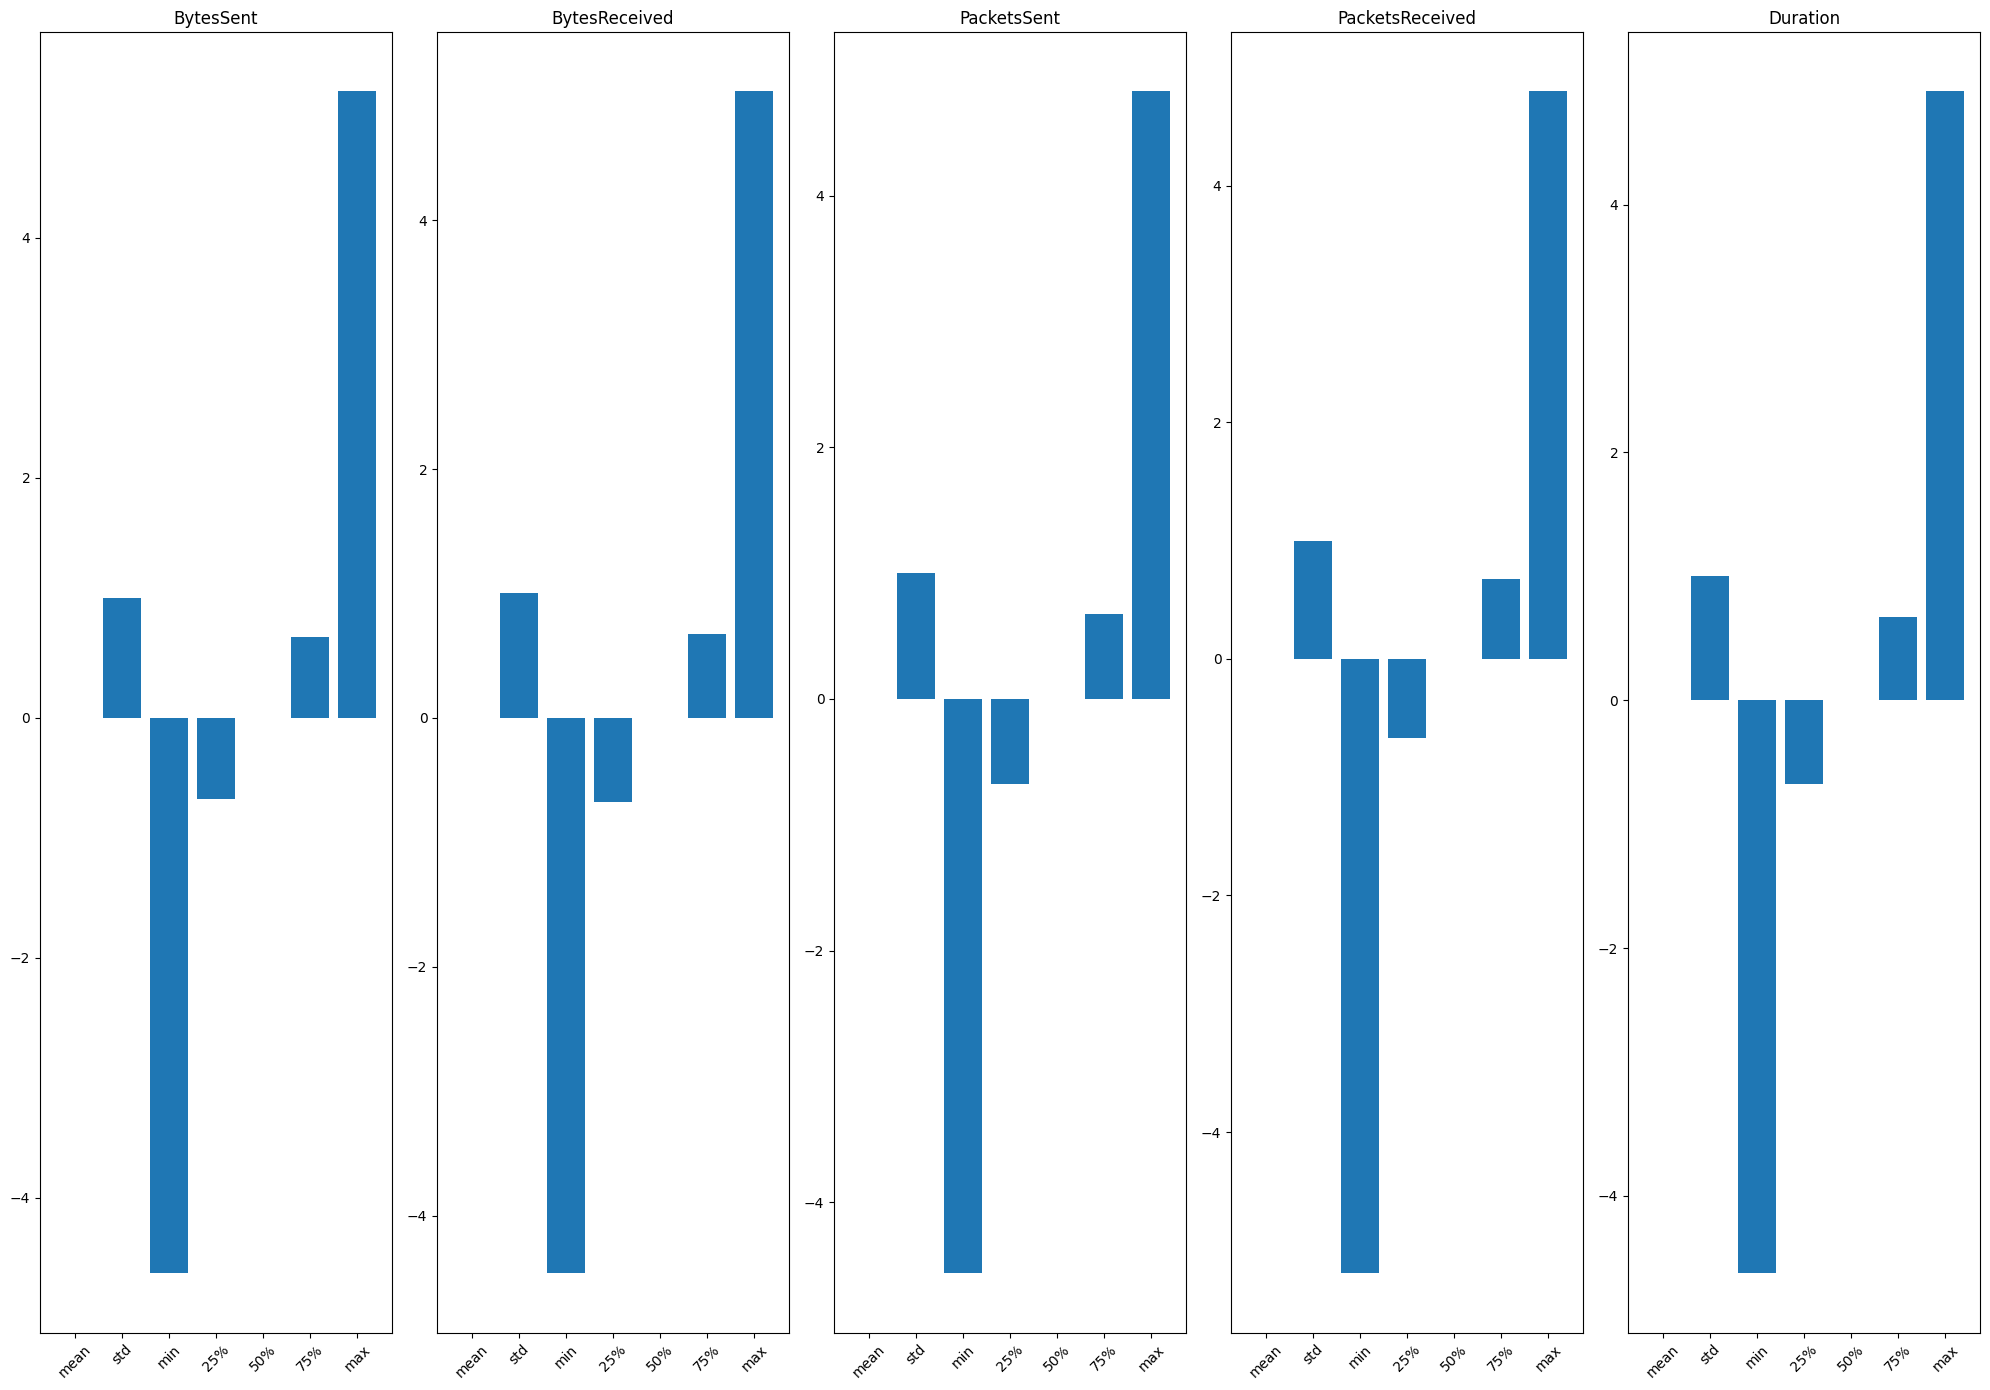

In [14]:
# Select numerical columns for plotting
numerical_cols = ['BytesSent', 'BytesReceived', 'PacketsSent', 'PacketsReceived', 'Duration']

# Create subplots
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 14))

# Plot statistical descriptions for each column in syn_data
for i, col in enumerate(numerical_cols):
    stats = syn_data[col].describe().drop('count')
    axes[i].bar(stats.index, stats.values)
    axes[i].set_title(col)
    axes[i].set_xticklabels(stats.index, rotation=45)

plt.tight_layout()
plt.show()

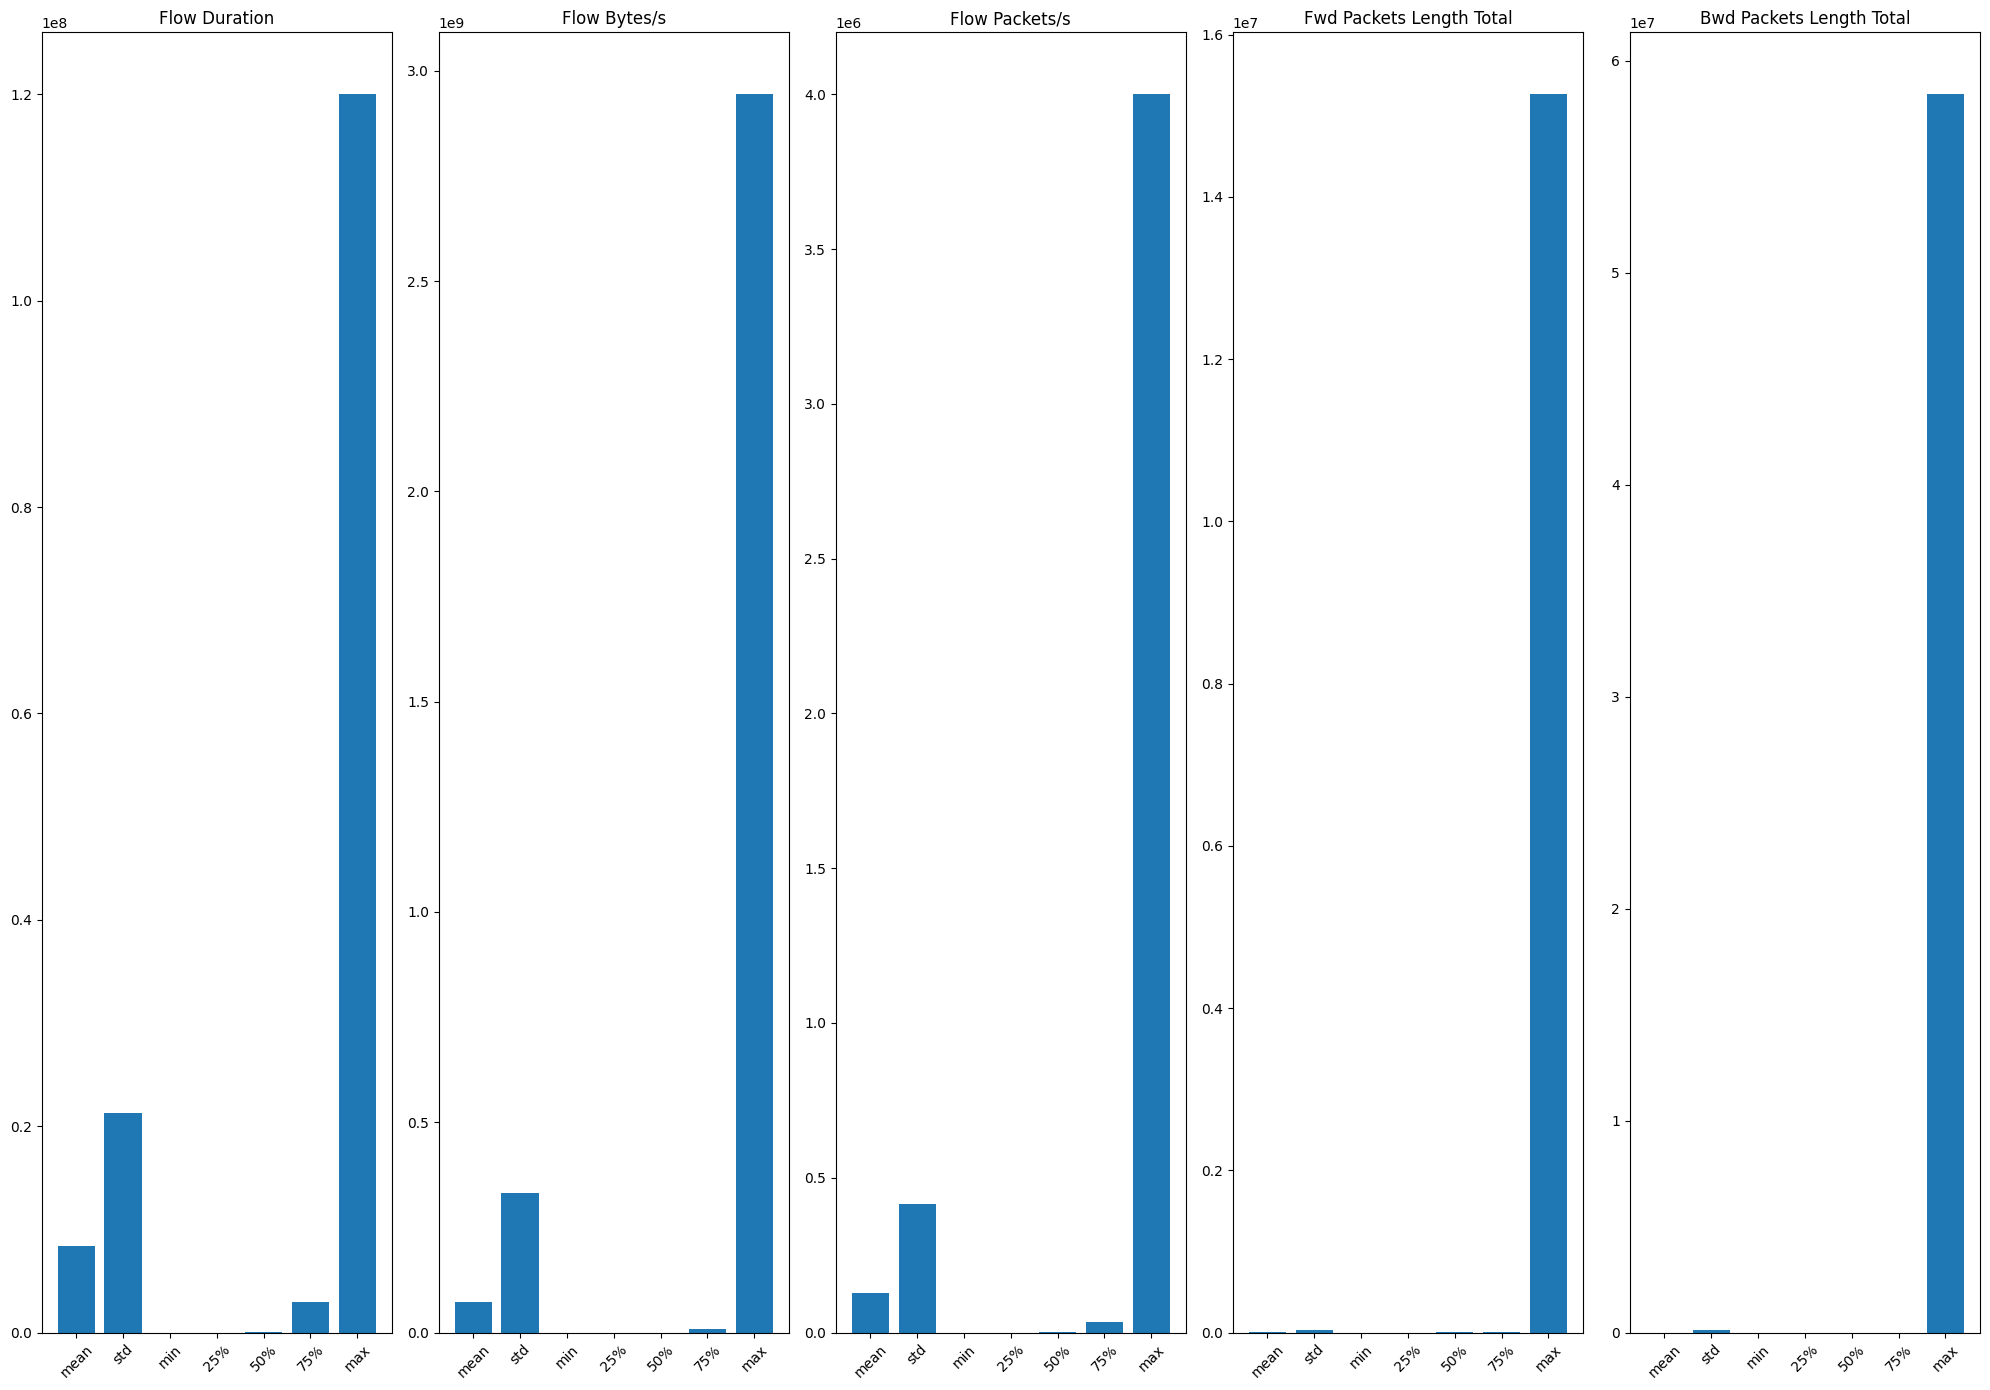

In [15]:
# Select numerical columns for plotting
numerical_cols = ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets Length Total', 'Bwd Packets Length Total']

# Create subplots
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 14))

# Plot statistical descriptions for each column in cicd_data
for i, col in enumerate(numerical_cols):
    stats = cicd_data[col].describe().drop('count')
    axes[i].bar(stats.index, stats.values)
    axes[i].set_title(col)
    axes[i].set_xticklabels(stats.index, rotation=45)

plt.tight_layout()
plt.show()

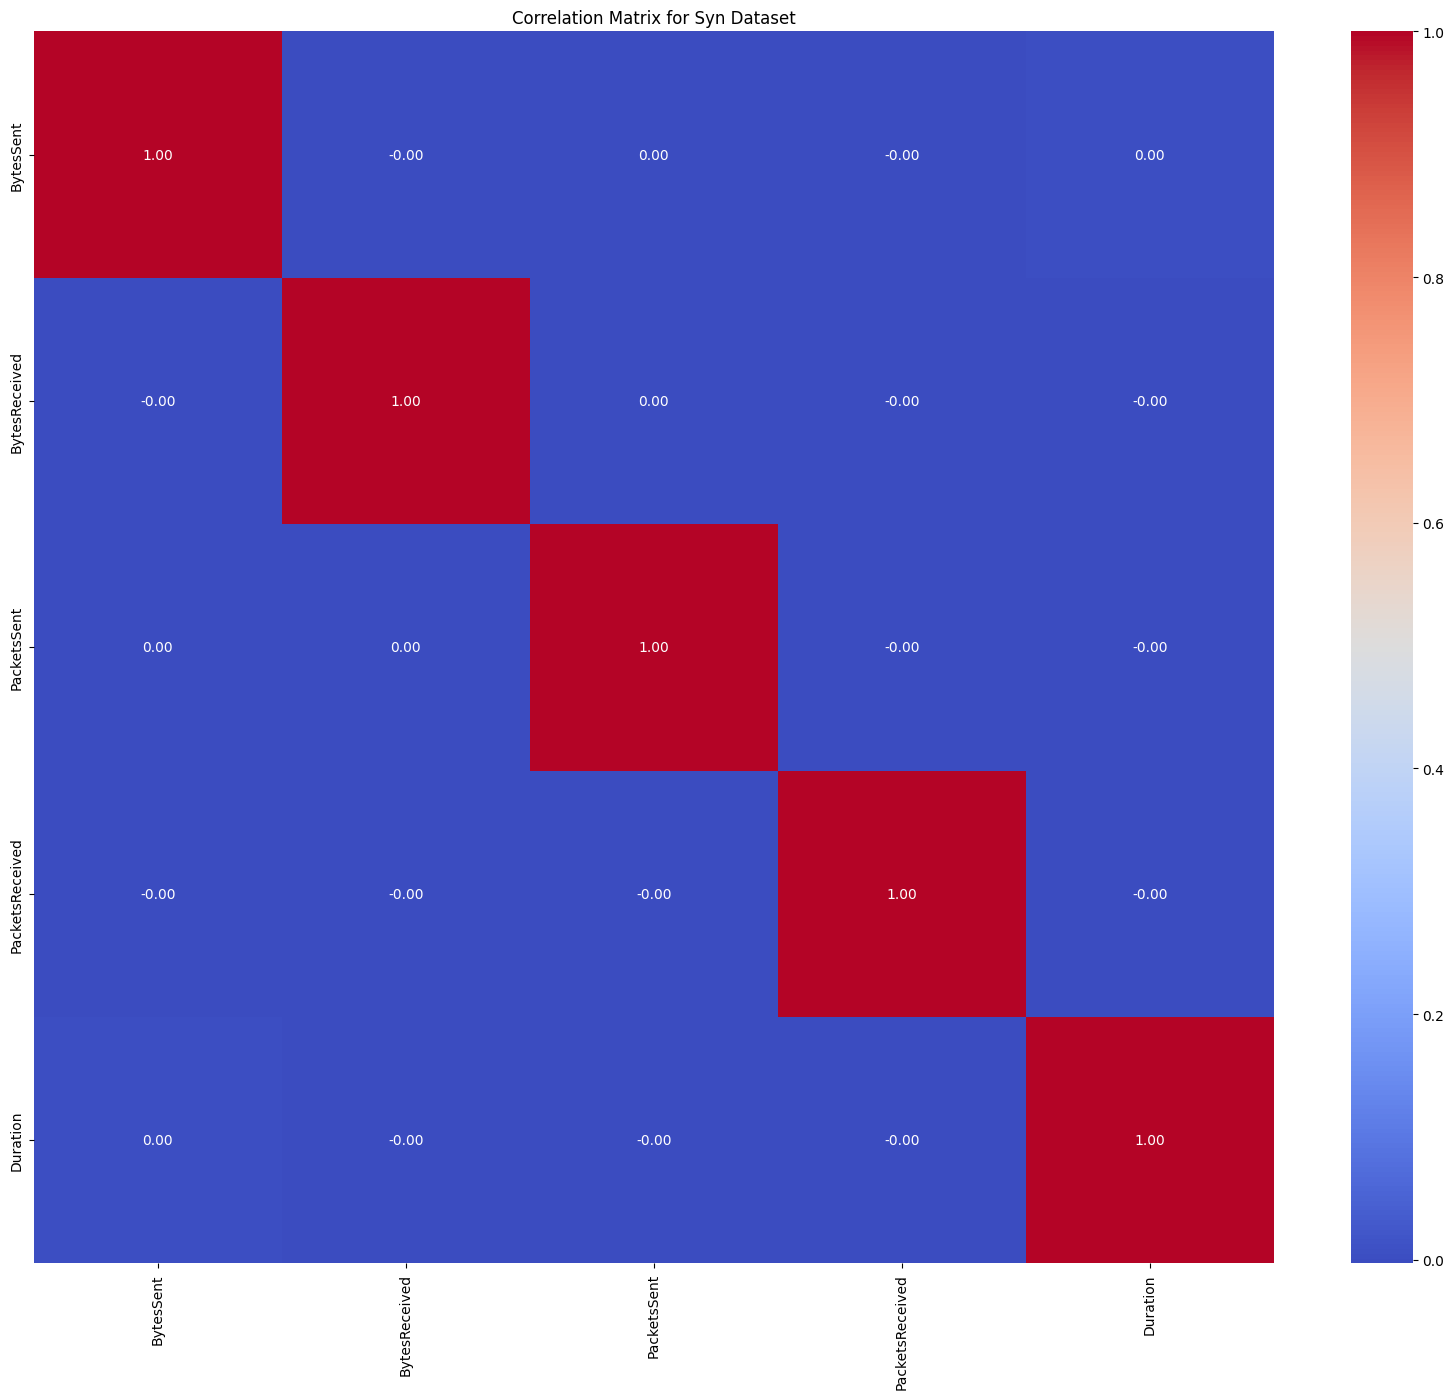

In [16]:
plt.figure(figsize=(20, 16))

# Calculate the correlation matrix
corr = syn_data[['BytesSent', 'BytesReceived', 'PacketsSent', 'PacketsReceived', 'Duration']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title
plt.title('Correlation Matrix for Syn Dataset')

# Display the plot
plt.show()

In [17]:
# Create X and Y for cicd_data
X_cicd = cicd_data.drop('Class', axis=1)
Y_cicd = cicd_data['Class']

# Create X and Y for syn_data
X_syn = syn_data.drop('IsAnomaly', axis=1)
Y_syn = syn_data['IsAnomaly']

In [18]:
X_cicd.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14


# **CICD LSTM**

100%

In [ ]:
# Verify the number of features
expected_columns = X_cicd.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cicd)

# Reshape the data for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_cicd, test_size=0.2, random_state=42)

# Define the LSTM model
model_cicd_lstm = Sequential()
model_cicd_lstm.add(LSTM(64, return_sequences=True, input_shape=(expected_columns, 1)))
model_cicd_lstm.add(Dropout(0.5))
model_cicd_lstm.add(LSTM(128))
model_cicd_lstm.add(Dropout(0.5))
model_cicd_lstm.add(Dense(64, activation='relu'))
model_cicd_lstm.add(Dropout(0.4))
model_cicd_lstm.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_cicd_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_cicd_lstm = model_cicd_lstm.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

Expected columns: 79
Epoch 1/5
1058/5393 ━━━━━━━━━━━━━━━━━━━━ 16:29 228ms/step - accuracy: 0.8621 - loss: 0.3497

# **CICD CNN**

100%

In [ ]:
#X_cicd
# Verify the number of features
expected_columns = X_cicd.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cicd)

# Reshape the data for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_cicd, test_size=0.2, random_state=42)

# Define the LSTM model
model_cicd_cnn = Sequential()
model_cicd_cnn.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(expected_columns, 1)))
model_cicd_cnn.add(MaxPooling1D(2))
model_cicd_cnn.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_cicd_cnn.add(MaxPooling1D(2))
model_cicd_cnn.add(Flatten())
model_cicd_cnn.add(Dense(128, activation='relu'))
model_cicd_cnn.add(Dropout(0.5))
model_cicd_cnn.add(Dense(64, activation='relu'))
model_cicd_cnn.add(Dropout(0.4))
model_cicd_cnn.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_cicd_cnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cicd_cnn = model_cicd_cnn.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

Expected columns: 79
Epoch 1/5
5393/5393 ━━━━━━━━━━━━━━━━━━━━ 152s 28ms/step - accuracy: 0.9857 - loss: 0.0384 - val_accuracy: 1.0000 - val_loss: 1.9479e-04
Epoch 2/5
5393/5393 ━━━━━━━━━━━━━━━━━━━━ 210s 29ms/step - accuracy: 0.9999 - loss: 5.1585e-04 - val_accuracy: 1.0000 - val_loss: 1.1482e-04
Epoch 3/5
5393/5393 ━━━━━━━━━━━━━━━━━━━━ 155s 29ms/step - accuracy: 1.0000 - loss: 2.7396e-04 - val_accuracy: 1.0000 - val_loss: 8.8818e-05
Epoch 4/5
5393/5393 ━━━━━━━━━━━━━━━━━━━━ 193s 27ms/step - accuracy: 0.9999 - loss: 3.3241e-04 - val_accuracy: 1.0000 - val_loss: 7.8586e-05
Epoch 5/5
5393/5393 ━━━━━━━━━━━━━━━━━━━━ 200s 27ms/step - accuracy: 1.0000 - loss: 1.0175e-04 - val_accuracy: 1.0000 - val_loss: 1.0678e-06


# **SYN LSTM**

100%

In [ ]:
# Verify the number of features
expected_columns = X_syn.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_syn)

# Reshape the data for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_syn, test_size=0.2, random_state=42)

# Define the LSTM model
model_syn_lstm = Sequential()
model_syn_lstm.add(LSTM(64, return_sequences=True, input_shape=(expected_columns, 1)))
model_syn_lstm.add(Dropout(0.5))
model_syn_lstm.add(LSTM(128))
model_syn_lstm.add(Dropout(0.5))
model_syn_lstm.add(Dense(64, activation='relu'))
model_syn_lstm.add(Dropout(0.4))
model_syn_lstm.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_syn_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_syn_lstm = model_syn_lstm.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

Expected columns: 10
Epoch 1/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 492s 39ms/step - accuracy: 0.9936 - loss: 0.0422 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 475s 37ms/step - accuracy: 0.9949 - loss: 0.0343 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 502s 37ms/step - accuracy: 0.9949 - loss: 0.0336 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 490s 36ms/step - accuracy: 0.9950 - loss: 0.0325 - val_accuracy: 0.9950 - val_loss: 0.0315
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 504s 36ms/step - accuracy: 0.9951 - loss: 0.0317 - val_accuracy: 0.9950 - val_loss: 0.0315


# **SYN CNN**

100%

In [ ]:
# Verify the number of features
expected_columns = X_syn.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_syn)

# Reshape the data for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_syn, test_size=0.2, random_state=42)

# Define the LSTM model
model_syn_cnn = Sequential()
model_syn_cnn.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(expected_columns, 1)))
model_syn_cnn.add(MaxPooling1D(2))
model_syn_cnn.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_syn_cnn.add(MaxPooling1D(2))
model_syn_cnn.add(Flatten())
model_syn_cnn.add(Dense(128, activation='relu'))
model_syn_cnn.add(Dropout(0.5))
model_syn_cnn.add(Dense(64, activation='relu'))
model_syn_cnn.add(Dropout(0.4))
model_syn_cnn.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_syn_cnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_syn_cnn = model_syn_cnn.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

Expected columns: 10
Epoch 1/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step - accuracy: 0.9939 - loss: 0.0412 - val_accuracy: 0.9950 - val_loss: 0.0318
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.9950 - loss: 0.0329 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.9950 - loss: 0.0323 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 143s 7ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9950 - val_loss: 0.0314
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - accuracy: 0.9948 - loss: 0.0329 - val_accuracy: 0.9950 - val_loss: 0.0314


# **SYN HYBRID**

100%

In [ ]:
# Verify the number of features
expected_columns = X_syn.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_syn)

# Reshape the data for Conv1D input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_syn, test_size=0.2, random_state=42)

# Define the CNN-LSTM hybrid model
input_layer = Input(shape=(expected_columns, 1))

# CNN layers
conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# LSTM layers
lstm1 = LSTM(64, return_sequences=True)(pool2)
lstm2 = LSTM(128)(lstm1)

# Dense layers
dense1 = Dense(64, activation='relu')(lstm2)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.4)(dense2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)  # Binary classification

# Compile the model
model_syn_hybrid = Model(inputs=input_layer, outputs=output_layer)
model_syn_hybrid.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_syn_hybrid = model_syn_hybrid.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

# **CICD HYBRID**

In [ ]:
# Verify the number of features
expected_columns = X_cicd.shape[1]
print(f"Expected columns: {expected_columns}")

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cicd)

# Reshape the data for Conv1D input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_reshaped, Y_cicd, test_size=0.2, random_state=42)

# Define the CNN-LSTM hybrid model
input_layer = Input(shape=(expected_columns, 1))

# CNN layers
conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)

# LSTM layers
lstm1 = LSTM(64, return_sequences=True)(pool2)
lstm2 = LSTM(128)(lstm1)

# Dense layers
dense1 = Dense(64, activation='relu')(lstm2)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.4)(dense2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)  # Binary classification

# Compile the model
model_cicd_hybrid = Model(inputs=input_layer, outputs=output_layer)
model_cicd_hybrid.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cicd_hybrid = model_cicd_hybrid.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=5, batch_size=64,
    callbacks=[early_stopping]
)

# **CICD LSTM**

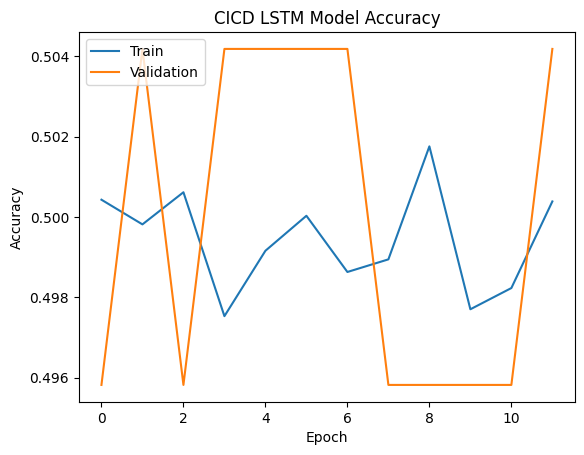

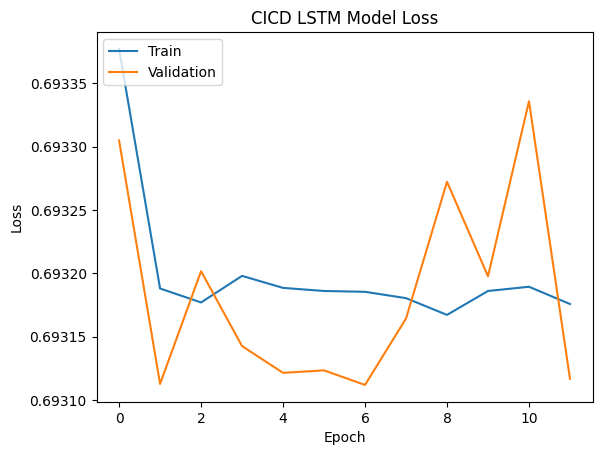

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_cicd_bilstm.history['accuracy'])
plt.plot(history_cicd_bilstm.history['val_accuracy'])
plt.title('CICD LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cicd_bilstm.history['loss'])
plt.plot(history_cicd_bilstm.history['val_loss'])
plt.title('CICD LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **CICD CNN**

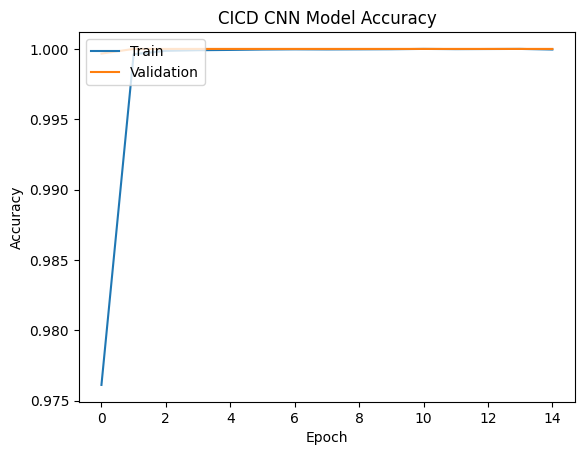

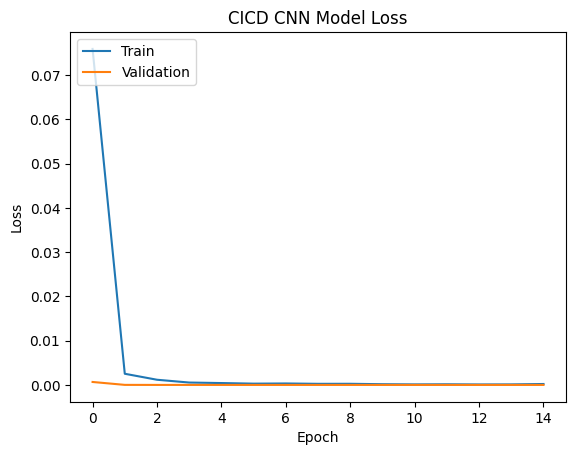

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_cicd_tl.history['accuracy'])
plt.plot(history_cicd_tl.history['val_accuracy'])
plt.title('CICD CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cicd_tl.history['loss'])
plt.plot(history_cicd_tl.history['val_loss'])
plt.title('CICD CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **SYN LSTM**

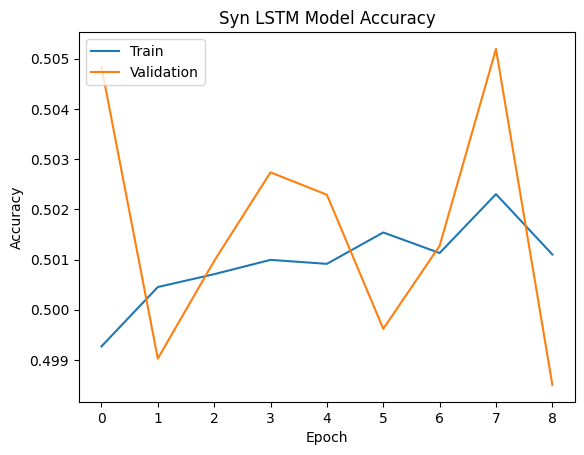

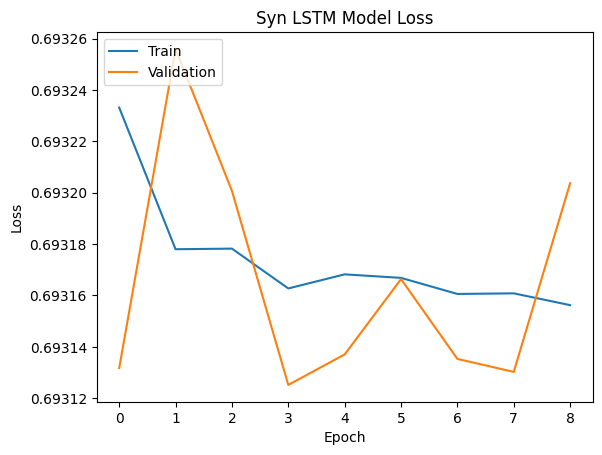

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_syn_lstm.history['accuracy'])
plt.plot(history_syn_lstm.history['val_accuracy'])
plt.title('Syn LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_syn_lstm.history['loss'])
plt.plot(history_syn_lstm.history['val_loss'])
plt.title('Syn LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **SYN CNN**

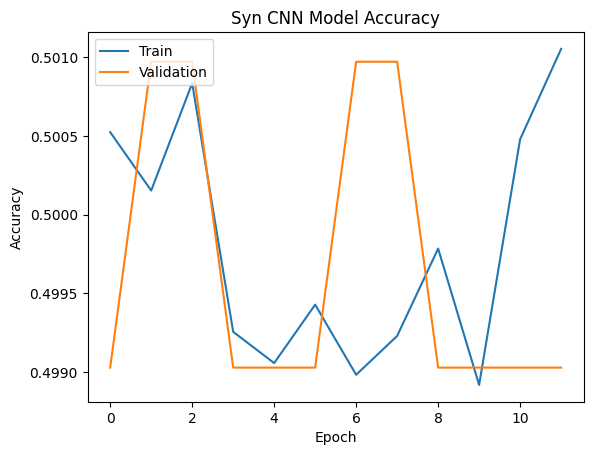

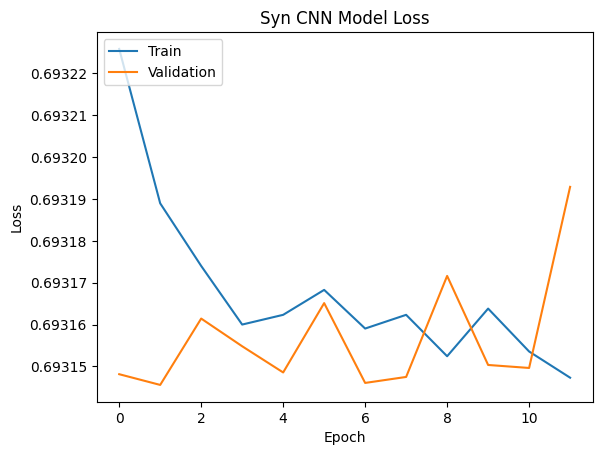

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_syn_cnn.history['accuracy'])
plt.plot(history_syn_cnn.history['val_accuracy'])
plt.title('Syn CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_syn_cnn.history['loss'])
plt.plot(history_syn_cnn.history['val_loss'])
plt.title('Syn CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Predict on the test set
Y_cicd_pred_lstm = model_cicd_bilstm.predict(X_cicd_test_lstm)
Y_cicd_pred_lstm = np.argmax(Y_cicd_pred_lstm, axis=1)  # Convert one-hot encoded predictions to class labels

# Convert test labels back to original form for comparison
Y_cicd_test_original = np.argmax(Y_cicd_test_lstm, axis=1)

# Generate classification report
report_cicd_lstm = classification_report(Y_cicd_test_original, Y_cicd_pred_lstm)
print(report_cicd_lstm)

938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14979
           1       0.50      1.00      0.67     15030

    accuracy                           0.50     30009
   macro avg       0.25      0.50      0.33     30009
weighted avg       0.25      0.50      0.33     30009



In [ ]:
# Predict on the test set (CICD CNN)
Y_cicd_pred_cnn = model_cicd_tl.predict(X_cicd_test_cnn)
Y_cicd_pred_cnn = np.argmax(Y_cicd_pred_cnn, axis=1)

# Convert test labels back to original form for comparison
Y_cicd_test_original = np.argmax(Y_cicd_test_categorical, axis=1)

# Generate classification report (CICD CNN)
report_cicd_cnn = classification_report(Y_cicd_test_original, Y_cicd_pred_cnn)
print(report_cicd_cnn)
# Import necessary function
from sklearn.metrics import precision_recall_fscore_support

# Extract metrics from classification report

# Assuming 'macro' averaging is desired
precision_cicd_cnn, recall_cicd_cnn, f1_score_cicd_cnn, _ = precision_recall_fscore_support(Y_cicd_test_original, Y_cicd_pred_cnn, average='macro')

# Calculate accuracy
accuracy_cicd_cnn = accuracy_score(Y_cicd_test_original, Y_cicd_pred_cnn)

print("CICD CNN Model Metrics:")
print("Accuracy:", accuracy_cicd_cnn)
print("Precision:", precision_cicd_cnn)
print("Recall:", recall_cicd_cnn)
print("F1-score:", f1_score_cicd_cnn)

939/939 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14984
           1       1.00      1.00      1.00     15035

    accuracy                           1.00     30019
   macro avg       1.00      1.00      1.00     30019
weighted avg       1.00      1.00      1.00     30019

CICD CNN Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
# Import the necessary function
from sklearn.metrics import precision_recall_fscore_support

# Predict on the test set (Syn CNN)
Y_syn_pred_cnn = model_syn_cnn.predict(X_syn_test_cnn)
Y_syn_pred_cnn = np.argmax(Y_syn_pred_cnn, axis=1)

# Convert test labels back to original form for comparison
Y_syn_test_original = np.argmax(Y_syn_test_categorical, axis=1)

# Generate classification report (Syn CNN)
report_syn_cnn = classification_report(Y_syn_test_original, Y_syn_pred_cnn)
print(report_syn_cnn)

# Extract metrics from classification report

# Assuming 'macro' averaging is desired
precision_syn_cnn, recall_syn_cnn, f1_score_syn_cnn, _ = precision_recall_fscore_support(Y_syn_test_original, Y_syn_pred_cnn, average='macro')

# Calculate accuracy
accuracy_syn_cnn = accuracy_score(Y_syn_test_original, Y_syn_pred_cnn)

print("Syn CNN Model Metrics:")
print("Accuracy:", accuracy_syn_cnn)
print("Precision:", precision_syn_cnn)
print("Recall:", recall_syn_cnn)
print("F1-score:", f1_score_syn_cnn)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC
Y_cicd_test_original = np.argmax(Y_cicd_test_categorical, axis=1)  # Ensure original test labels
Y_cicd_test_binarized = label_binarize(Y_cicd_test_original, classes=np.unique(Y_cicd_test_original))
Y_cicd_pred_lstm_proba = model_cicd_bilstm.predict(X_cicd_test_lstm)

# Print the shapes to debug
print("Shape of Y_cicd_test_binarized:", Y_cicd_test_binarized.shape)
print("Shape of Y_cicd_pred_lstm_proba:", Y_cicd_pred_lstm_proba.shape)

# Ensure the lengths match
if Y_cicd_test_binarized.shape[0] != Y_cicd_pred_lstm_proba.shape[0]:
    print("Mismatch in the number of samples between test labels and predictions")
else:
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes_cicd):
        fpr[i], tpr[i], _ = roc_curve(Y_cicd_test_binarized[:, i], Y_cicd_pred_lstm_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure()
    for i in range(num_classes_cicd):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CICD LSTM Model - Multi-Class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
Shape of Y_cicd_test_binarized: (30019, 1)
Shape of Y_cicd_pred_lstm_proba: (30009, 2)
Mismatch in the number of samples between test labels and predictions


In [ ]:
# prompt: plot the roc curve too for the first model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
Y_cicd_test_binarized = label_binarize(Y_cicd_test_original, classes=np.unique(Y_cicd_test_original))
Y_cicd_pred_lstm_proba = model_cicd_bilstm.predict(X_cicd_test_lstm)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes_cicd):
    fpr[i], tpr[i], _ = roc_curve(Y_cicd_test_binarized[:, i], Y_cicd_pred_lstm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(num_classes_cicd):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CICD LSTM Model - Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


# **HYBRID CICD**

100%

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_cicd.history['accuracy'])
plt.plot(history_cicd.history['val_accuracy'])
plt.title('Syn LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cicd.history['loss'])
plt.plot(history_cicd.history['val_loss'])
plt.title('Syn LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **HYBRID SYN**

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_syn.history['accuracy'])
plt.plot(history_syn.history['val_accuracy'])
plt.title('Syn LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_syn.history['loss'])
plt.plot(history_syn.history['val_loss'])
plt.title('Syn LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import zipfile

# Save models
model_cicd_bilstm.save('model_cicd_bilstm.h5')
model_cicd_tl.save('model_cicd_tl.h5')
model_syn_lstm.save('model_syn_lstm.keras')
model_syn_cnn.save('model_syn_cnn.keras')
model_cicd.save('model_hybrid_cicd.keras')
model_syn.save('model_hybrid_syn.keras')

# Create a zip file and add the saved models to it
with zipfile.ZipFile('saved_models.zip', 'w') as zipf:
    zipf.write('model_cicd_bilstm.h5')
    zipf.write('model_cicd_tl.h5')
    zipf.write('model_syn_lstm.keras')
    zipf.write('model_syn_cnn.keras')
    zipf.write('model_hybrid_cicd.keras')
    zipf.write('model_hybrid_syn.keras')

print("All models have been saved and zipped successfully.")


In [ ]:
# predicting from the hybrid cnn saved model on cicd data



In [ ]:
Y_cicd.iloc[0]

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model_hybrid_cicd.keras')

cicd_data = pd.read_csv('/content/drive/MyDrive/DDOD-Data/cicddos2019_dataset.csv')

cicd_data = cicd_data.drop(columns=['Unnamed: 0'], errors='ignore')

label_encoder = LabelEncoder()
cicd_data['Label'] = label_encoder.fit_transform(cicd_data['Label'])
cicd_data['Class'] = label_encoder.fit_transform(cicd_data['Class'])

assert cicd_data.shape[1] == 79, f"Expected 79 columns, but got {cicd_data.shape[1]} columns"

row_data = cicd_data.iloc[0].values  # Change index 0 to select a different row

row_data = row_data.reshape(1, -1)

scaler = MinMaxScaler()
row_data_scaled = scaler.fit_transform(row_data)

X_input = row_data_scaled.reshape(1, 79, 1)

prediction = model.predict(X_input)

anomaly_threshold = 0.5
is_anomaly = prediction > anomaly_threshold

print("Prediction:", prediction)
print("Is Anomaly:", is_anomaly)

is_anomaly = np.argmax(prediction[0]) == 1

print('Is there an anomaly?:', is_anomaly)

In [ ]:
df = pd.read_csv('/content/normalized_data.csv')
df.head()
df.shape

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load the saved model
model_path = '/content/model_syn_cnn_retrained.keras'
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Print model summary to verify the input shape
model.summary()

# Load and prepare the data
data_path = '/content/drive/MyDrive/DDOD-Data/synthetic_network_traffic.csv'
syn_data = pd.read_csv(data_path)

# Separate features and target
X_syn = syn_data.drop('IsAnomaly', axis=1)
Y_syn = syn_data['IsAnomaly']

# Check the number of columns
expected_columns = 10
assert X_syn.shape[1] == expected_columns, f"Expected {expected_columns} columns, but got {X_syn.shape[1]} columns"

# Initialize the scaler and fit on the entire feature dataset
scaler = MinMaxScaler()
#X_syn_scaled = scaler.fit_transform(X_syn)
df = scaler.fit_transform(df)

# Select a single row of data for prediction
#row_data = df.iloc[0].values.reshape(1, -1)
row_data = df.reshape(1, -1)

# Scale the selected row
row_data_scaled = scaler.transform(row_data)

# Reshape the data to match the input shape of the model (1 sample, 10 time steps, 1 feature)
X_input = row_data_scaled.reshape(1, 9, 1)

# Debug: Print shapes
print(f"Input shape: {X_input.shape}")

# Perform prediction
try:
    prediction = model.predict(X_input)
    anomaly_threshold = 0.5
    is_anomaly = prediction > anomaly_threshold

    print("Prediction:", prediction)
    print("Is Anomaly:", is_anomaly)
except Exception as e:
    print("Error during prediction:", e)
